In [17]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
alt.renderers.enable('notebook')

alt.data_transformers.disable_max_rows()
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [2]:
!ls

Airline Delays, 2004-2019.ipynb airline_delay_causes.csv


In [3]:
df = pd.read_csv("airline_delay_causes.csv")

In [4]:
#Worst airlines by year 
#Worst airports by year
#Delays over time - worst seasons to travel (calendar heatmap)
#Sankey Diagram for each airport
#Security delays

In [41]:
df.dtypes

year                     int64
month                    int64
carrier_name            object
airport                 object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object

In [6]:
df = df.drop(['airport_name', 'carrier'], axis=1)

In [7]:
df.dtypes

year                     int64
 month                   int64
carrier_name            object
airport                 object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
 weather_ct            float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
 arr_delay             float64
 carrier_delay         float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object

In [8]:
df=df.rename(columns={' month': 'month',
                     ' weather_ct': 'weather_ct',
                     ' arr_delay': 'arr_delay',
                     ' carrier_delay': 'carrier_delay'})

In [9]:
df.groupby(by='airport')['weather_delay'].sum()

airport
EWR    1360159.0
JFK    1074943.0
LGA    1518860.0
Name: weather_delay, dtype: float64

In [10]:
df.carrier_name.value_counts()

Delta Air Lines Inc.            543
American Airlines Inc.          543
JetBlue Airways                 522
United Air Lines Inc.           500
ExpressJet Airlines Inc.        430
US Airways Inc.                 382
American Eagle Airlines Inc.    339
Mesa Airlines Inc.              243
Continental Air Lines Inc.      237
Comair Inc.                     236
Alaska Airlines Inc.            226
Southwest Airlines Co.          219
Northwest Airlines Inc.         204
AirTran Airways Corporation     190
Virgin America                  170
Frontier Airlines Inc.          169
Atlantic Southeast Airlines     166
SkyWest Airlines Inc.           147
Envoy Air                       101
Pinnacle Airlines Inc.           99
Spirit Air Lines                 85
Hawaiian Airlines Inc.           84
Endeavor Air Inc.                66
ATA Airlines d/b/a ATA           53
Republic Airline                 51
America West Airlines Inc.       40
PSA Airlines Inc.                32
Independence Air            

In [11]:
df2 = df[['month', 'carrier_name', 'weather_ct']]

In [12]:
df2.pivot_table(columns='month', index='carrier_name', values='weather_ct').reset_index()

month,carrier_name,1,2,3,4,5,6,7,8,9,10,11,12
0,ATA Airlines d/b/a ATA,0.636667,0.000000,0.530000,0.203333,0.388000,0.420000,0.365000,0.030000,0.014000,0.000000,0.250000,0.030000
1,AirTran Airways Corporation,0.796000,0.436667,0.802667,0.470000,0.744706,0.688824,0.962941,0.725882,0.206875,0.071250,0.106000,0.322667
2,Alaska Airlines Inc.,0.489474,0.666842,0.071053,0.059474,0.141500,0.206111,0.421111,0.352778,0.117895,0.253158,0.538421,0.698421
3,Allegiant Air,1.475000,0.000000,0.000000,0.000000,0.000000,0.750000,1.000000,0.000000,0.000000,0.960000,0.000000,0.290000
4,America West Airlines Inc.,0.155000,0.500000,0.280000,0.000000,0.027500,0.200000,0.747500,0.720000,0.000000,0.652500,0.000000,0.050000
5,American Airlines Inc.,11.326222,9.442444,7.335111,6.380667,10.104583,15.079778,15.063111,14.119556,8.667333,3.828222,3.906000,11.039111
6,American Eagle Airlines Inc.,7.806429,6.765000,4.459643,4.342692,5.078966,5.214828,5.230000,4.087586,2.358276,3.214286,3.269643,6.422500
7,Atlantic Coast Airlines,NaN,NaN,NaN,NaN,1.926667,0.943333,1.746667,2.376667,0.500000,NaN,NaN,NaN
8,Atlantic Southeast Airlines,2.375455,2.326923,1.652308,3.152500,2.980769,2.097333,2.846667,2.188667,1.114667,1.736429,1.755000,2.800769
9,Comair Inc.,43.461667,33.227059,37.510000,28.465000,35.819500,43.744286,51.297619,46.527143,31.387143,36.070500,32.780000,45.570000


In [13]:
df2.index.drop

<bound method Index.drop of RangeIndex(start=0, stop=6143, step=1)>

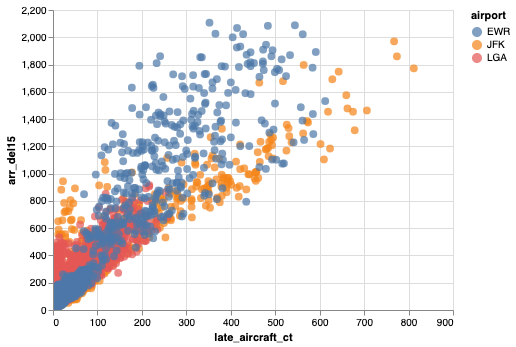

In [23]:
source = df
alt.Chart(source).mark_circle(size=60).encode(
    x='late_aircraft_ct',
    y='arr_del15',
    color='airport',
    tooltip=['carrier_name']
).interactive()


In [42]:
df3 = df[(df['year'] == 2018)]


In [43]:
df3.head()

,year,month,carrier_name,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
1499,2018,1,Envoy Air,JFK,217.0,42.0,9.55,2.02,16.47,0.00,13.96,19.0,1.0,2305.0,505.0,424.0,655.0,0.0,721.0
1500,2018,1,PSA Airlines Inc.,JFK,26.0,7.0,2.35,0.00,1.77,0.00,2.88,4.0,0.0,566.0,308.0,0.0,63.0,0.0,195.0
1501,2018,1,Virgin America,JFK,357.0,53.0,16.15,0.00,29.46,1.38,6.02,20.0,1.0,3131.0,1221.0,0.0,1670.0,51.0,189.0
1502,2018,1,Republic Airline,JFK,249.0,46.0,11.78,1.44,17.69,0.00,15.09,27.0,1.0,3002.0,874.0,200.0,584.0,0.0,1344.0
1503,2018,1,Endeavor Air Inc.,JFK,2082.0,309.0,72.06,23.87,117.64,0.00,95.43,223.0,5.0,31968.0,9354.0,4816.0,10127.0,0.0,7671.0
